# Lecture 2: Image Filtering


## Part 1: What is an image?

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from skimage import io as io_url

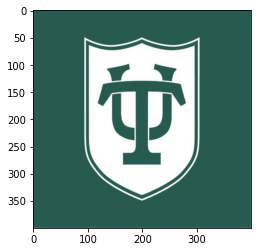

In [3]:
frame = io_url.imread('http://www.cs.tulane.edu/~zding1/tulane.jpg')
frame = np.float32(frame) / 255

plt.imshow(frame)

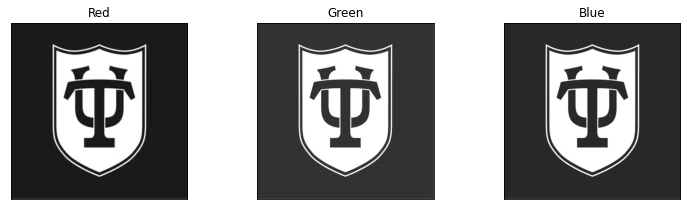

In [4]:
fig = plt.figure(figsize=(12, 12));
fig.subplots_adjust(hspace=0.4, wspace=0.4);

ax = fig.add_subplot(1, 3, 1);
ax.set_title('Red');
ax.imshow(frame[:,:,0], cmap="gray");
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(1, 3, 2);
ax.set_title('Green');
ax.imshow(frame[:,:,1], cmap="gray");
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(1, 3, 3);
ax.set_title('Blue');
ax.imshow(frame[:,:,2], cmap="gray");
ax.set_xticks([]); ax.set_yticks([]);

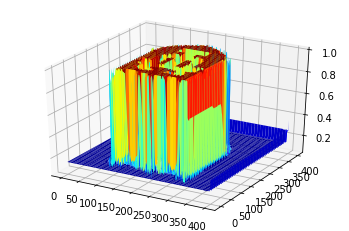

In [5]:
x = range(frame.shape[0]);
y = range(frame.shape[1]);

X, Y = np.meshgrid(y, x);

fig = plt.figure();
ax = plt.axes(projection='3d');
ax.plot_surface(X, Y, frame[:,:,0], cmap='jet');

## Part 2: Point processing

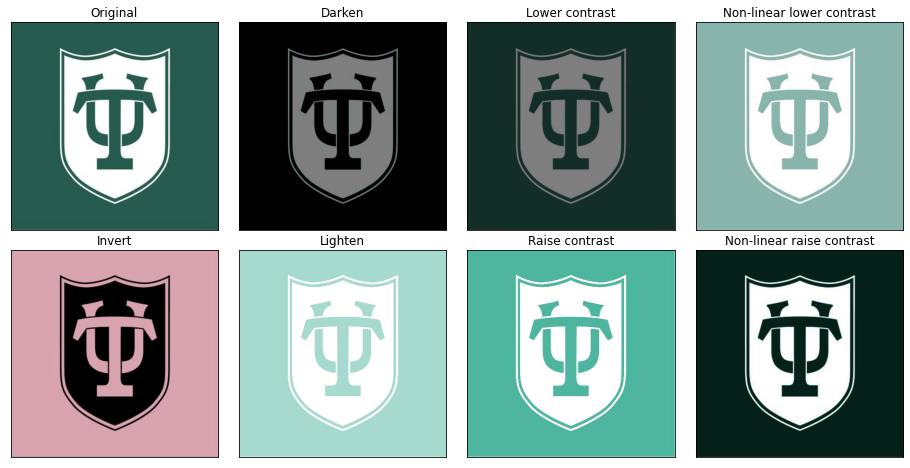

In [6]:
fig = plt.figure(figsize=(16, 8));
fig.subplots_adjust(hspace=0.1, wspace=0.1);

ax = fig.add_subplot(2, 4, 1);
ax.set_title('Original');
ax.imshow(frame);
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 4, 2);
ax.set_title('Darken');
ax.imshow(np.clip(frame - 0.5, 0, 1));
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 4, 3);
ax.set_title('Lower contrast');
ax.imshow(frame / 2);
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 4, 4);
ax.set_title('Non-linear lower contrast');
ax.imshow(frame**(1/3));
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 4, 5);
ax.set_title('Invert');
ax.imshow(1 - frame);
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 4, 6);
ax.set_title('Lighten');
ax.imshow(np.clip(frame + 0.5, 0, 1));
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 4, 7);
ax.set_title('Raise contrast');
ax.imshow(np.clip(frame * 2, 0, 1));
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 4, 8);
ax.set_title('Non-linear raise contrast');
ax.imshow(frame**2);
ax.set_xticks([]); ax.set_yticks([]);

## Part 3: Linear shift-invariant image filtering

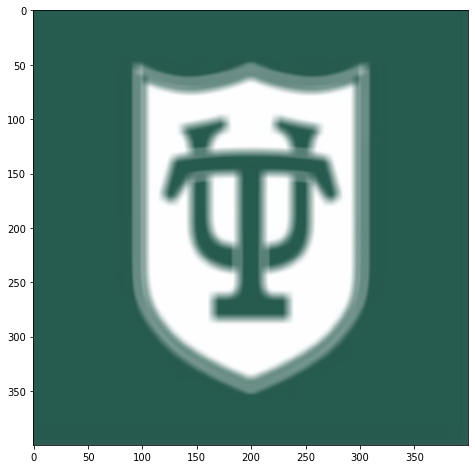

In [7]:
fig = plt.figure(figsize=(16, 8));

# Box filter
N = 10;
g = np.ones((N,N))/(N**2);

image = cv2.filter2D(frame,-1,g);
plt.imshow(image);

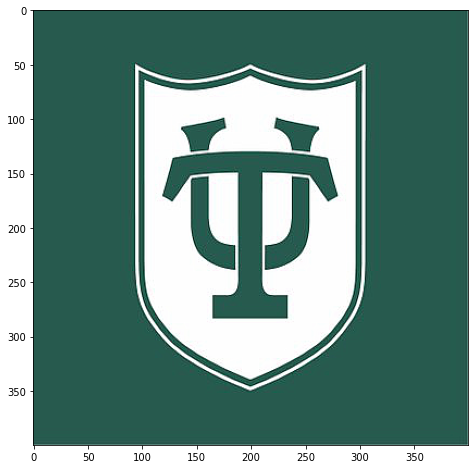

In [8]:
fig = plt.figure(figsize=(16, 8));

# Sharpening filter
N = 3;
g = -np.ones((N,N))/(N**2);
g[(N-1)//2,(N-1)//2] += 2;

image = cv2.filter2D(frame,-1,g);
plt.imshow(np.clip(image,0,1),cmap='gray');

## Part 4: Image gradients

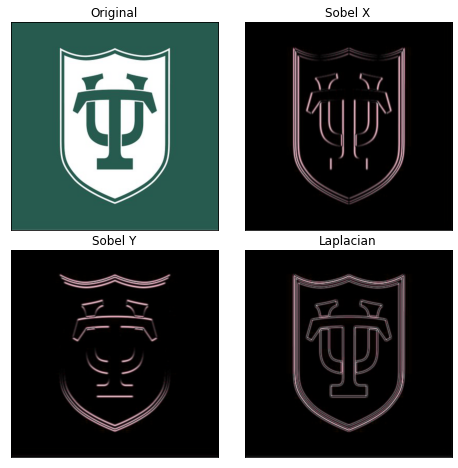

In [9]:
k = 7 # Kernel size

laplacian = cv2.Laplacian(frame,-1,ksize=k)
sobel_x = cv2.Sobel(frame,-1,1,0,ksize=k)
sobel_y = cv2.Sobel(frame,-1,0,1,ksize=k)

fig = plt.figure(figsize=(8, 8));
fig.subplots_adjust(hspace=0.1, wspace=0.1);

ax = fig.add_subplot(2, 2, 1);
ax.set_title('Original');
ax.imshow((frame), cmap='gray');
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 2, 2);
ax.set_title('Sobel X');
ax.imshow(np.abs(sobel_x)/np.abs(sobel_x).max(), cmap='gray');
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 2, 3);
ax.set_title('Sobel Y');
ax.imshow(np.abs(sobel_y)/np.abs(sobel_y).max(), cmap='gray');
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 2, 4);
ax.set_title('Laplacian');
ax.imshow(np.abs(laplacian)/np.abs(laplacian).max(), cmap='gray');
ax.set_xticks([]); ax.set_yticks([]);